In [6]:
import cv2 as cv
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 8)

In [8]:
# image_path = './stuff.jpg'
image_path = './people.jpg'

In [9]:
src = cv.imread(image_path)

In [10]:
src.shape

(576, 768, 3)

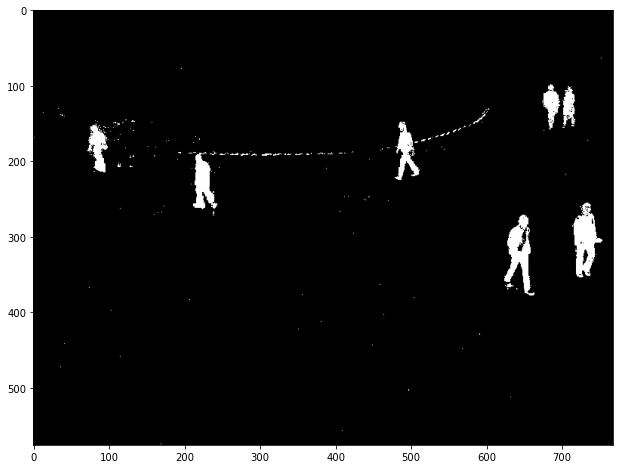

In [11]:
plt.imshow(src);

In [12]:
# cv.blur?

In [13]:
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
kernel_size = 3
src_gray = cv.blur(src_gray, (kernel_size, kernel_size))
src_gray.shape

(576, 768)

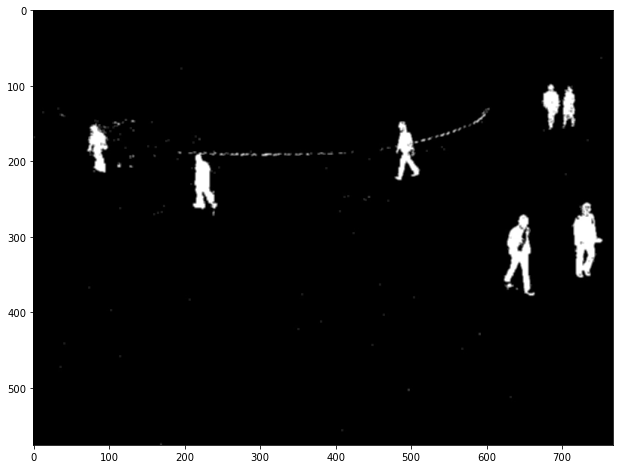

In [14]:
plt.imshow(src_gray, cmap='gray');

In [15]:
# cv.Canny?

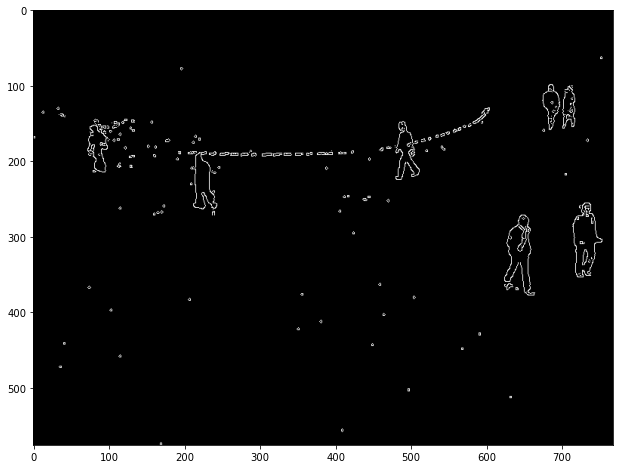

In [16]:
# threshold = 500
threshold = 50

canny_output = cv.Canny(src_gray, threshold, threshold * 2)
plt.imshow(canny_output, cmap='gray');

In [17]:
# cv.findContours?

In [18]:
contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [19]:
len(contours)

277

In [20]:
contour = contours[5]
contour.shape

(4, 1, 2)

In [21]:
# cv.approxPolyDP?

In [22]:
epsilon = 3
contour_poly = cv.approxPolyDP(contour, epsilon, True)
contour_poly.shape

(2, 1, 2)

In [23]:
# cv.boundingRect?

In [24]:
bbox = cv.boundingRect(contour_poly)
x, y, width, height = bbox

In [25]:
# cv.rectangle?

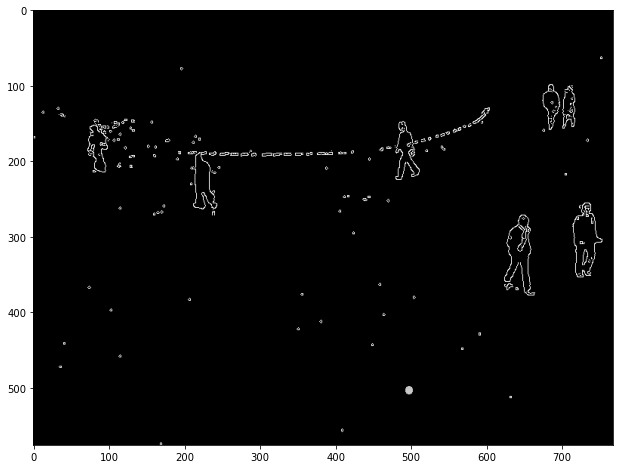

In [26]:
color = 200
line_width = 5
detection_image = canny_output.copy()
cv.rectangle(detection_image, (x, y), (x + width, y + height), color, line_width);
plt.imshow(detection_image, cmap='gray');

In [27]:
min_size = 15
epsilon = 3

bboxes = []

for contour in contours:
    contour_poly = cv.approxPolyDP(contour, epsilon, True)
    bbox = cv.boundingRect(contour_poly)
    _, _, w, h = bbox
    if w > min_size and h > min_size:
        bboxes.append(bbox)
len(bboxes)        

11

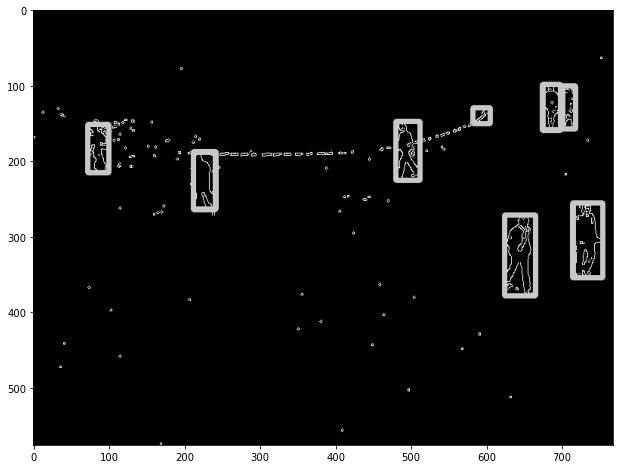

In [28]:
color = 200
line_width = 5
detection_image = canny_output.copy()

for bbox in bboxes:
    x, y, w, h = bbox
    cv.rectangle(detection_image, (x, y), (x + w, y + h), color, line_width);
    
plt.imshow(detection_image, cmap='gray');

In [29]:
def copy_region(img, bbox):
    x, y, w, h = bbox
 
    region = img[y:y+h, x:x+w].copy()
    return region

In [64]:
# bbox = bboxes[0]
bbox = bboxes[10]

(60, 23)

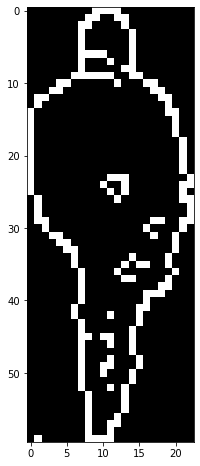

In [65]:
region = copy_region(canny_output, bbox)
plt.imshow(region, cmap='gray');
region.shape

(60, 23)

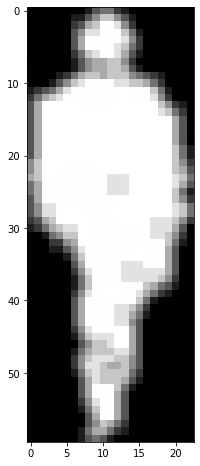

In [66]:
region = copy_region(src_gray, bbox)
plt.imshow(region, cmap='gray');
region.shape

In [67]:
xres = 32
yres = 64

In [68]:
# cv.resize?

(64, 32)

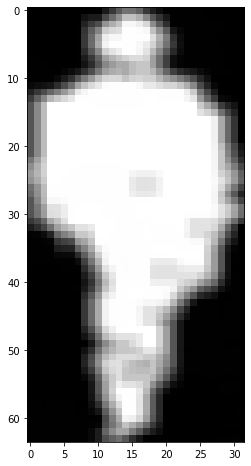

In [69]:
resized = cv.resize(region, (xres, yres), interpolation = cv.INTER_AREA)
plt.imshow(resized, cmap='gray');
resized.shape

In [70]:
def calc_area(box):
  ymin, xmin, ymax, xmax = box
  area = (xmax - xmin) * (ymax - ymin)
  return area  

def calc_overlap_area(box1, box2):
  ymin_1, xmin_1, ymax_1, xmax_1 = box1
  ymin_2, xmin_2, ymax_2, xmax_2 = box2
  x_overlap = max(0, min(xmax_1, xmax_2) - max(xmin_1, xmin_2))
  y_overlap = max(0, min(ymax_1, ymax_2) - max(ymin_1, ymin_2))
  area = x_overlap * y_overlap
  return area

def calc_overlap_ratio(box1, box2):
  return calc_overlap_area(box1, box2) / calc_area(box1)    